In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width: 90% !important; }</style>'))

In [2]:
import sys
sys.path.append("../../simpsom")
import simpsom as sps

import pandas as pd
import numpy as np

from pylettes import *

In [3]:
pylette = Tundra(reverse=True).cmap

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
labels = digits.target
data = np.array(df)
data.shape

(1797, 64)

In [22]:
from functools import partial 

def run_experiment(data, PBC=True, init='PCA', metric='euclidean', topology='hexagonal', 
               GPU=False, neighborhood_fun='gaussian', train_algo='batch', early_stop=None,
               plotall=False, size=10, epochs=100):

    net = sps.SOMNet(size, size, data, topology=topology, PBC=PBC, init=init, metric=metric, random_seed=32, GPU=GPU, debug=False)
    net.train(train_algo=train_algo, start_learning_rate=0.01, epochs=epochs, batch_size=-1, early_stop=early_stop, early_stop_tolerance=1e-4, early_stop_patience=5)
    
    if plotall:

        net.plot_map_by_feature(feature=1, show=True, print_out=False, cmap=pylette)
        _ = net.plot_map_by_difference(show=True, print_out=False, returns=False, cmap=pylette)

        _ = net.plot_projected_points(net.project_onto_map(data), 
                                     project=False, jitter=True, 
                                     show=True, print_out=False, cmap=pylette)
        _ = net.plot_projected_points(data, color_val=[n.difference for n in net.nodes_list],
                                     project=True, jitter=True, 
                                     show=True, print_out=False, cmap=pylette)

        #labs, points = net.cluster(data, algorithm='AgglomerativeClustering')
        #net.plot_clusters(data, labs, project=True, show=True)
        labs, points = net.cluster(data, algorithm='DBSCAN')
        net.plot_clusters(data, labs, project=True, show=True)
        labs, points = net.cluster(data, algorithm='DBSCAN', metric=partial(net.polygons.distance_pbc,
                                                                            net_shape=(net.net_width, net.net_height),
                                                                            distance_func=lambda x, y: net.xp.sqrt(net.xp.sum(net.xp.square(x-y))),
                                                                            xp=net.xp))
        net.plot_clusters(data, labs, project=True, show=True)
        labs, points = net.cluster(data, algorithm='KMeans')
        net.plot_clusters(data, labs, project=True, show=True)

        net.plot_convergence(fsize=(5, 5), logax=False)

In [25]:
GPU=False

confs = [
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'cosine', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'manhattan', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'random', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':(np.array([[0,1]]*data.shape[1])).T, 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': True, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'square', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'mexican', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'bubble', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':None, 'plotall':False},
{'PBC': True, 'init':'PCA', 'metric':'euclidean', 'topology':'square', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': True, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'cosine', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'manhattan', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':'bmudiff', 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':'mapdiff', 'plotall':False}, 
{'PBC': True, 'init':'PCA', 'metric':'euclidean', 'topology':'square', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':True},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':'mapdiff', 'plotall':True},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'square', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':True},
]

2022-09-29 18:23:08.067 | INFO     | simpsom.network:__init__:104 - Periodic Boundary Conditions active.
2022-09-29 18:23:08.068 | INFO     | simpsom.network:__init__:113 - Hexagonal topology.
2022-09-29 18:23:08.069 | WARNING  | simpsom.network:_set_weights:178 - Please be sure that the data have been standardized before using PCA.
2022-09-29 18:23:08.071 | INFO     | simpsom.network:_set_weights:179 - The weights will be initialized with PCA.
2022-09-29 18:23:08.078 | INFO     | simpsom.network:train:377 - The map will be trained with the batch algorithm.


CPU
{'PBC': True, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'batch', 'early_stop': None, 'epochs': -1, 'plotall': True}


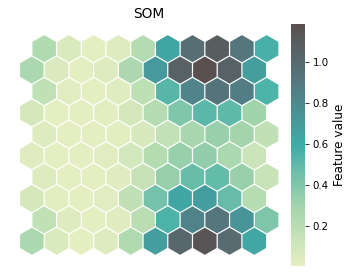

2022-09-29 18:23:10.473 | INFO     | simpsom.network:get_nodes_difference:563 - Weights difference among neighboring nodes calculated.


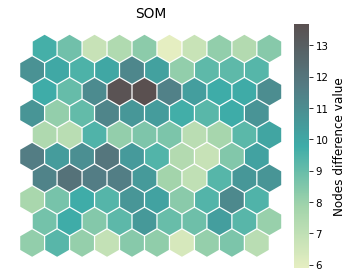

2022-09-29 18:23:10.633 | INFO     | simpsom.network:project_onto_map:590 - Projected coordinates will be saved to:
././som_projected.npy


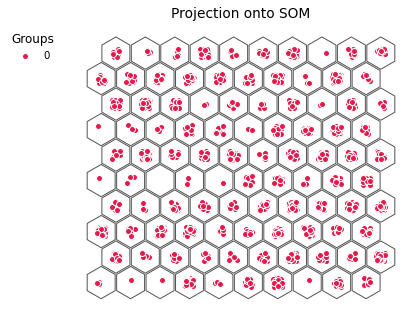

2022-09-29 18:23:10.771 | INFO     | simpsom.network:project_onto_map:590 - Projected coordinates will be saved to:
././som_projected.npy


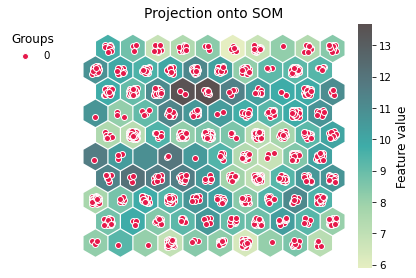

2022-09-29 18:23:10.978 | INFO     | simpsom.network:project_onto_map:590 - Projected coordinates will be saved to:
./som_projected_DBSCAN.npy
2022-09-29 18:23:10.981 | WARNING  | simpsom.network:cluster:623 - PBC are active. Make sure to provide a PBC-compatible custom metric if possible, or use `polygon.distance_pbc`. See the documentation for more detail.
2022-09-29 18:23:11.063 | INFO     | simpsom.network:cluster:663 - Clustering results will be saved to:
././som_clusters.npy
2022-09-29 18:23:11.070 | INFO     | simpsom.network:project_onto_map:590 - Projected coordinates will be saved to:
././som_projected.npy
/Users/federico comitani/GitHub/simpsom/simpsom/polygons.py:82: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
 

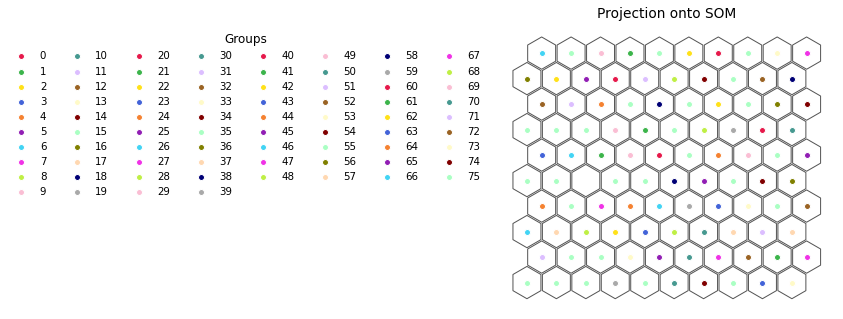

2022-09-29 18:23:15.620 | INFO     | simpsom.network:plot_clusters:888 - Clustering plot will be saved to:
././som_clusters.png
2022-09-29 18:23:15.627 | INFO     | simpsom.network:project_onto_map:590 - Projected coordinates will be saved to:
./som_projected_DBSCAN.npy
2022-09-29 18:23:15.631 | WARNING  | simpsom.network:cluster:623 - PBC are active. Make sure to provide a PBC-compatible custom metric if possible, or use `polygon.distance_pbc`. See the documentation for more detail.
2022-09-29 18:24:00.941 | INFO     | simpsom.network:cluster:663 - Clustering results will be saved to:
././som_clusters.npy
2022-09-29 18:24:00.947 | INFO     | simpsom.network:project_onto_map:590 - Projected coordinates will be saved to:
././som_projected.npy
/Users/federico comitani/GitHub/simpsom/simpsom/polygons.py:82: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered 

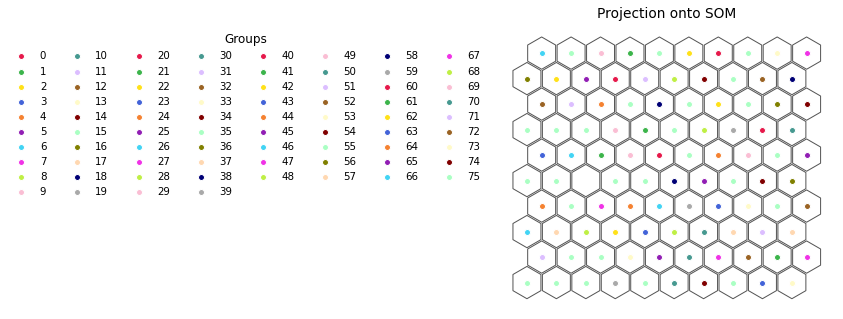

2022-09-29 18:24:05.418 | INFO     | simpsom.network:plot_clusters:888 - Clustering plot will be saved to:
././som_clusters.png
2022-09-29 18:24:05.425 | INFO     | simpsom.network:project_onto_map:590 - Projected coordinates will be saved to:
./som_projected_KMeans.npy
2022-09-29 18:24:05.429 | WARNING  | simpsom.network:cluster:623 - PBC are active. Make sure to provide a PBC-compatible custom metric if possible, or use `polygon.distance_pbc`. See the documentation for more detail.
2022-09-29 18:24:05.519 | INFO     | simpsom.network:cluster:663 - Clustering results will be saved to:
././som_clusters.npy
2022-09-29 18:24:05.525 | INFO     | simpsom.network:project_onto_map:590 - Projected coordinates will be saved to:
././som_projected.npy
/Users/federico comitani/GitHub/simpsom/simpsom/polygons.py:82: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered 

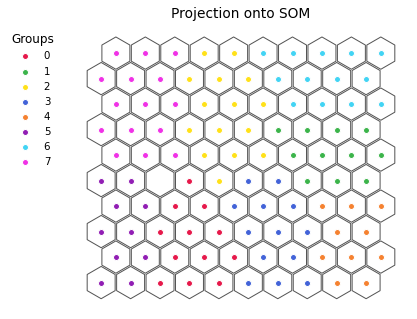

2022-09-29 18:24:06.419 | INFO     | simpsom.network:plot_clusters:888 - Clustering plot will be saved to:
././som_clusters.png
2022-09-29 18:24:06.420 | WARNING  | simpsom.network:plot_convergence:764 - The current parameters yelded no convergence. The plot will not be produced.


All CPU tests done!


In [24]:
print('CPU')
for conf in confs:
    print(conf)
    run_experiment(data, **conf)
print('All CPU tests done!')

In [34]:
# metric_key = 'affinity' if algorithm == 'AgglomerativeClustering' else  'metric'
# if metric_key in kwargs:
#     if kwargs[metric_key].__name__ != 'distance_pbc':
#         kwargs[metric_key] = partial(self.polygons.distance_pbc,
#                                    net_shape=(
#                                        self.net_width, self.net_height),
#                                    distance_func=kwargs['metric'],
#                                    xp=self.xp)
# else:
#     logger.warning("Distance metric for clustering not provided, " +
#                    "PBC-asdjusted eucliden distance will be used.")
#     kwargs[metric_key] = partial(self.polygons.distance_pbc,
#                                net_shape=(
#                                    self.net_width, self.net_height),
#                                distance_func=lambda x, y: self.xp.sqrt(
#                                    self.xp.sum(self.xp.square(x-y))),
#                                xp=self.xp)

In [ ]:
try:
    import cupy
    print('GPU')
    for conf in confs:
        print(conf)
        conf['GPU']=True
        run_experiment(data, **conf)
    print('All GPU tests done!')
except ImportError:
    print('No CuPy found, GPU tests will be skipped')